   # Welcome To This Notebook😃

# Project Name :- Total Caps Production Predictor

### Problem Statement :- 

The goal of this project is to train a Machine Learning model that accurately estimates the total production of caps based on Date & Time and Production per hour features. The model aims to contribute to optimizing production planning and resource allocation.

### Problems to Solve:-

**1) Outlier Detection and outlier treatment of 'Production Per Hour' feature**

**2) Train a Machine Learning model that accurately estimates the total production of caps based on Date & Time and Production per hour features.**

### Dataset:

The dataset includes the following features:

Date & Time: The timestamp indicating when the production data was recorded.

Production per Hour: The amount of production recorded per hour.

**Target Variable:**

Total Production: The total production accumulated during the recorded period.

## Importing Libraries

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

## Importing the Dataset

In [310]:
df1 = pd.read_csv(r"C:\Users\91770\Downloads\cap-production-data.csv")

## Setiing Display options to ensure feature name visibility

In [311]:
pd.set_option('display.max_columns',None)

## Warning Suppression

In [312]:
import warnings
warnings.filterwarnings('ignore')

## Creating copy of original dataset

In [313]:
df = df1.copy()

## Eyeballing Dataset

In [314]:
#Checking first 5 rows of dataset

df.head()

,Date & Time,Production per hour,Total Production
0,27/01/2024 17:11:44,77,77
1,27/01/2024 18:11:44,52,129
2,27/01/2024 19:11:44,62,191
3,27/01/2024 20:11:44,47,238
4,27/01/2024 21:11:44,35,273


In [315]:
# Checking shape of dataset

df.shape

(499, 3)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date & Time          499 non-null    object
 1   Production per hour  499 non-null    int64 
 2   Total Production     499 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [317]:
# Checing columns

df.columns

Index(['Date & Time', 'Production per hour', 'Total Production'], dtype='object')

In [318]:
# Checking datatypes

df.dtypes

Date & Time            object
Production per hour     int64
Total Production       object
dtype: object

In [319]:
# Checking Duplicated values

df.duplicated().sum()

0

## Initial Observations About Raw Data

- 1. We have 499 rows and 3 columns 

  Independent Feature : 'Date & Time' and 'Production per hour'

  Dependent Feature : 'Total Production'
  
  
- 2. Datatypes of 'Date & Time' and 'Production per hour' are 'object' we have to change it to 'datetime' and 'int64' respectively.

- 3. We have to create some useful features using 'Date & Time' feature so we can enrich our dataset.

- 4. In Total production there is comma in some 'Total Production' feature, e.g.;-22,685, we have replace comma.

- 5. There are no duplicate values in the dataset

- 6. Rename feature name 'Production per hour' to 'Production Per Hour'.

## Data Cleaning

In [320]:
# Replacing comma with space in Total Production variable

df['Total Production'] = df['Total Production'].str.replace(',','')

In [321]:
# Changing datatype of 'Total Production Column'

df['Total Production'] = df['Total Production'].astype('int64')

In [322]:
# Changing Datatype of 'Date & Time' feature

df['Date & Time'] = pd.to_datetime(df['Date & Time'], format='%d/%m/%Y %H:%M:%S')

In [323]:
# Checking datatypes

df.dtypes

Date & Time            datetime64[ns]
Production per hour             int64
Total Production                int64
dtype: object

In [324]:
# Renaming feature name 'Production per hour' to 'Production Per Hour'.

df.rename(columns={'Production per hour': 'Production Per Hour'}, inplace=True)

In [325]:
df.sample()

,Date & Time,Production Per Hour,Total Production
294,2024-02-08 23:11:44,63,21419


## Enriching our dataset using 'Date & Time'  Variable

#### Extracting Year, Month and Days

In [326]:
df['Year'] = df['Date & Time'].dt.year

df['Month'] = df['Date & Time'].dt.month

df['Day'] = df['Date & Time'].dt.day

#### Extracting Day of Week

In [327]:
df['Day_of_Week'] = df['Date & Time'].dt.dayofweek

#### Extracting Hour, Minutes and Seconds

In [328]:
df['Hour'] = df['Date & Time'].dt.hour
df['Minute'] = df['Date & Time'].dt.minute
df['Second'] = df['Date & Time'].dt.second

In [329]:
# Checking first 5 rows just to confirm about all features created
df.head()

,Date & Time,Production Per Hour,Total Production,Year,Month,Day,Day_of_Week,Hour,Minute,Second
0,2024-01-27 17:11:44,77,77,2024,1,27,5,17,11,44
1,2024-01-27 18:11:44,52,129,2024,1,27,5,18,11,44
2,2024-01-27 19:11:44,62,191,2024,1,27,5,19,11,44
3,2024-01-27 20:11:44,47,238,2024,1,27,5,20,11,44
4,2024-01-27 21:11:44,35,273,2024,1,27,5,21,11,44


In [330]:
# Checking datatypes of newely created features

df.dtypes

Date & Time            datetime64[ns]
Production Per Hour             int64
Total Production                int64
Year                            int64
Month                           int64
Day                             int64
Day_of_Week                     int64
Hour                            int64
Minute                          int64
Second                          int64
dtype: object

## As we have extracted required information from 'Date & Time' feature, we will now drop 'Date & Time' feature from dataset because of below reason

If the date and time features you extracted to capture the information you need for your analysis or modeling, keeping the original datetime column might introduce redundancy and unnecessary dimensionality.

In [331]:
df = df.drop(['Date & Time'],axis=1)

## Exploratory Data Analysis (EDA)

In [332]:
df.describe()

,Production Per Hour,Total Production,Year,Month,Day,Day_of_Week,Hour,Minute,Second
count,499.000000,499.000000,499.0,499.000000,499.000000,499.000000,499.000000,499.0,499.0
mean,65.917836,18268.839679,2024.0,1.793587,13.004008,2.979960,11.474950,11.0,44.0
std,278.952637,8902.021523,0.0,0.405136,9.373550,2.001907,6.957767,0.0,0.0
min,-63.000000,77.000000,2024.0,1.000000,1.000000,0.000000,0.000000,11.0,44.0
25%,16.500000,11916.500000,2024.0,2.000000,6.000000,1.000000,5.000000,11.0,44.0
50%,46.000000,18970.000000,2024.0,2.000000,11.000000,3.000000,11.000000,11.0,44.0
75%,75.000000,25150.000000,2024.0,2.000000,16.000000,5.000000,18.000000,11.0,44.0
max,5879.000000,32893.000000,2024.0,2.000000,31.000000,6.000000,23.000000,11.0,44.0


### Observation

There are outliers in 'Production Per Hour' feature.

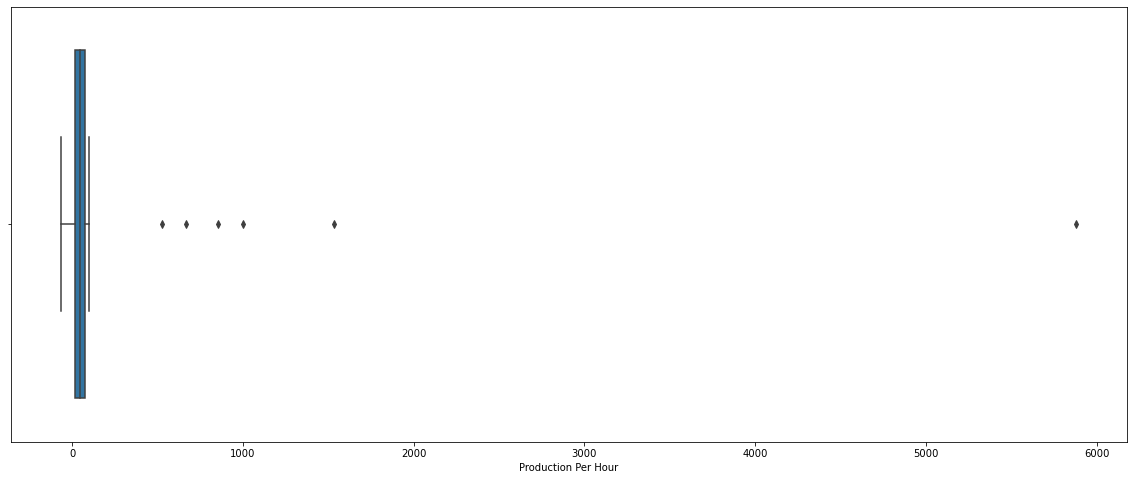

In [333]:
# Checking outliers for 'Production Per Hour' feature using boxplot

plt.figure(figsize=(20, 8))
sns.boxplot(x='Production Per Hour', data=df)
plt.show()

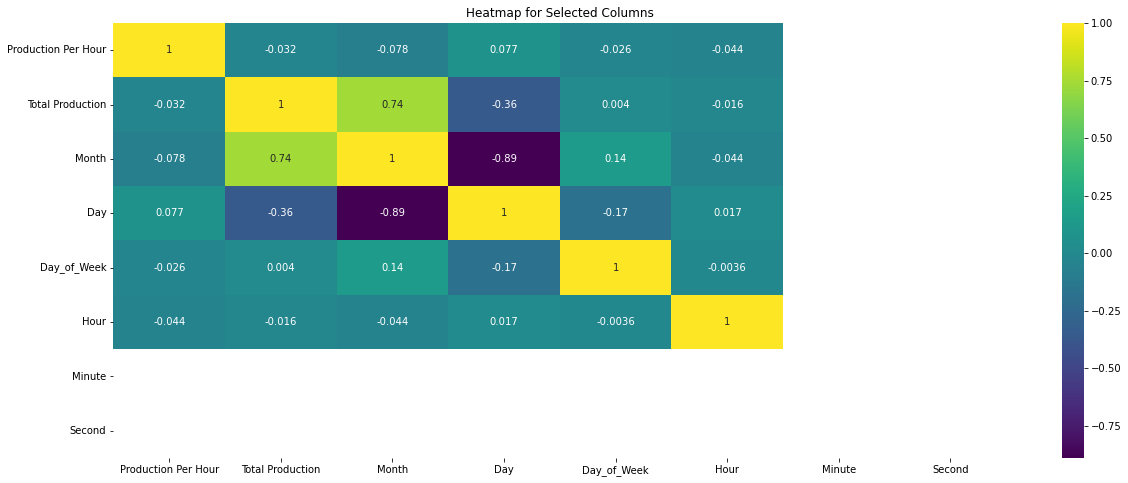

In [334]:
# Creating heat map

selected_columns = ['Production Per Hour', 'Total Production', 'Month', 'Day', 'Day_of_Week', 'Hour', 'Minute', 'Second']

plt.figure(figsize=(20, 8))
sns.heatmap(df[selected_columns].corr(), annot=True, cmap='viridis')
plt.title('Heatmap for Selected Columns')
plt.show()

In [335]:
# Checking Missing Values

df.isna().sum()

Production Per Hour    0
Total Production       0
Year                   0
Month                  0
Day                    0
Day_of_Week            0
Hour                   0
Minute                 0
Second                 0
dtype: int64

#### Observation :

- 1. There are no any highly correlated feature which is greater than 0.9.

- 2. There are no any missing values in dataset


## Feature Engineering

### Train Test Split

In [336]:
X = df.drop(['Total Production'],axis=1)
y = df['Total Production']

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [338]:
X_train.shape

(349, 8)

In [339]:
X_test.shape

(150, 8)

## Problem No. 1

### To detect anamolies/outliers in 'Production Per Hour' feature and treat them.

**Detecting of outlier :- Using Box Plot**

**Treatment for outlier :- Capping**

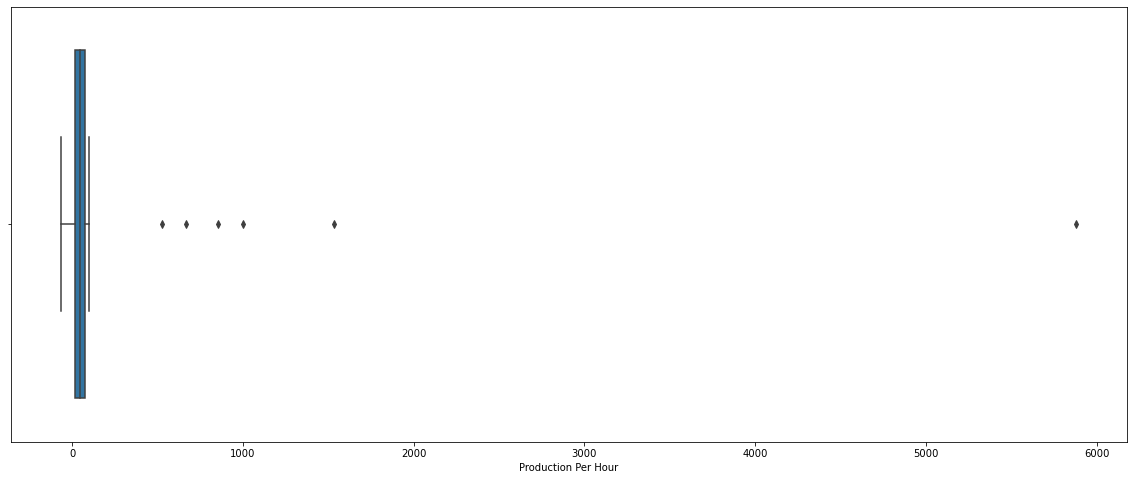

In [340]:
# Checking outliers for 'Production Per Hour' feature using boxplot

plt.figure(figsize=(20,8))
sns.boxplot(x='Production Per Hour', data=df)
plt.show()

<AxesSubplot:xlabel='Production Per Hour', ylabel='Density'>

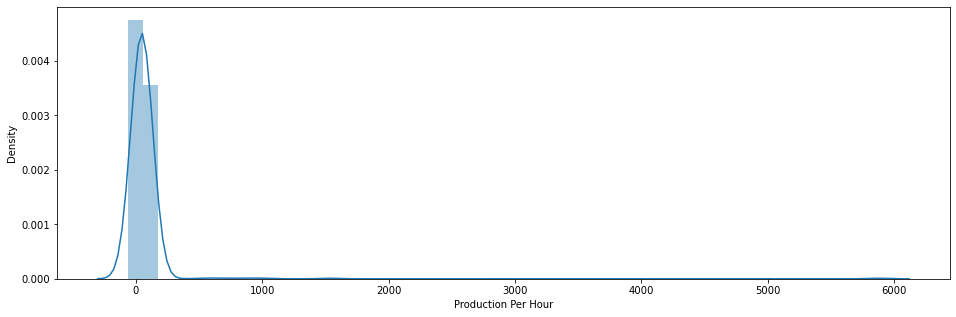

In [341]:
plt.figure(figsize=(16,5))
sns.distplot(df['Production Per Hour'])

#### Observation:-

As we can see 'Production Per Hour' follows skewed distribution, hence we will use upper limit and lower limit using IQR method to cap the outliers.

In [342]:
# Calculating 25th and 75th percentile

percentile25 = X_train['Production Per Hour'].quantile(0.25)
percentile75 = X_train['Production Per Hour'].quantile(0.75)

In [343]:
# Calculating IQR

IQR = percentile75 - percentile25

In [344]:
IQR

61.0

In [345]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [346]:
print('Upper_limit',upper_limit)
print('Lower_limit',lower_limit)

Upper_limit 168.5
Lower_limit -75.5


## Finding Outliers

In [347]:
X_train[X_train['Production Per Hour'] > upper_limit]

,Production Per Hour,Year,Month,Day,Day_of_Week,Hour,Minute,Second
184,1532,2024,2,4,6,9,11,44
62,5879,2024,1,30,1,7,11,44
21,1002,2024,1,28,6,14,11,44
151,526,2024,2,3,5,0,11,44


In [348]:
X_train[X_train['Production Per Hour'] < lower_limit]

,Production Per Hour,Year,Month,Day,Day_of_Week,Hour,Minute,Second


## Capping the anamolies/outliers

In [349]:
X_train['Production Per Hour'] = np.where(
   X_train['Production Per Hour'] > upper_limit,
   upper_limit,
   
   np.where(
      X_train['Production Per Hour'] < lower_limit,
      lower_limit,
      X_train['Production Per Hour'] 
   ) 

)

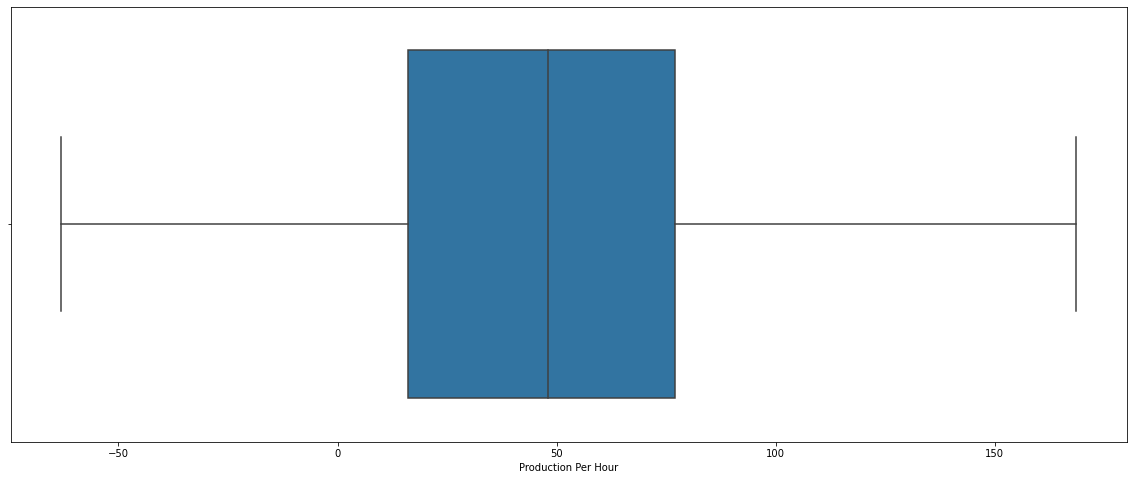

In [350]:
# Checking outliers for 'Production Per Hour' feature using boxplot after capping

plt.figure(figsize=(20,8))
sns.boxplot(x='Production Per Hour', data=X_train)
plt.show()

## Problem No. 2 :

## Model Training

In [351]:
def train_test_models(models, X_train, X_test, y_train, y_test):
    r2_scores = {}
    
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        
        r2 = r2_score(y_test, model.predict(X_test))
        
        r2_scores[model_name] = r2
        
        print(f"{model_name} R2 Score: {r2}")
    
    return r2_scores

In [352]:
models = {
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor()
}

In [353]:
results = train_test_models(models, X_train, X_test, y_train, y_test)

Decision Tree R2 Score: 0.9998756544197035
Random Forest R2 Score: 0.99956006932605


### Observation:-

We are getting 0.99 r2 score for both models

## Hyperparametr Tunning

In [354]:
def hyperparameter_tuning(models, param_grids, X_train, X_test, y_train, y_test):
    best_params = {}
    best_scores = {}

    for model_name, model in models.items():
        param_grid = param_grids[model_name]

        grid_search = GridSearchCV(model, param_grid, scoring='r2', cv=5)
        grid_search.fit(X_train, y_train)

        best_params[model_name] = grid_search.best_params_
        best_scores[model_name] = grid_search.best_score_

        best_estimator = grid_search.best_estimator_
        test_predictions = best_estimator.predict(X_test)
        test_score = r2_score(y_test, test_predictions)

        print(f"{model_name} - Best Parameters: {best_params[model_name]}")
        print(f"{model_name} - Best r2 Score: {best_scores[model_name]}")
        print(f"{model_name} - Test Score: {test_score}\n")

    return best_params, best_scores

In [355]:
param_grids = {
    'Decision Tree': {
        'criterion': ['mse', 'mae'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'criterion': ['mse', 'mae'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10]
    }
}

In [356]:
best_params, best_scores = hyperparameter_tuning(models, param_grids, X_train, X_test, y_train, y_test)

Decision Tree - Best Parameters: {'criterion': 'mse', 'max_depth': 10, 'min_samples_split': 2}
Decision Tree - Best r2 Score: 0.9986768282159989
Decision Tree - Test Score: 0.9998566041718395

Random Forest - Best Parameters: {'criterion': 'mae', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest - Best r2 Score: 0.9987925711595385
Random Forest - Test Score: 0.9995921472740097



#### Observation :

**Both models are giving good prediction**

# Thank You For Going Through This Notebook😃

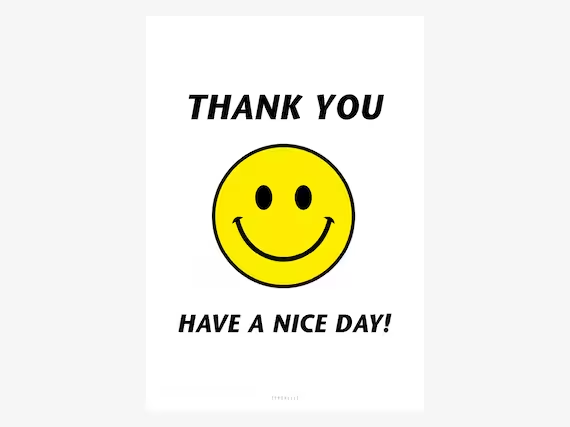